In [1]:
import numpy as np
import pandas as pd
import random

# 乱数生成

確率密度関数のサンプリングってどうすればいいんだろ？というところから。
標準正規分布で実践してみる。

In [38]:
import random
import itertools

def search(value, items, boundaries):
    x = itertools.dropwhile(lambda tpl: tpl[1] < value, zip(items, boundaries))
    return next(x)[0]

def sampling(items, prob_func=None, n=1, probabilities=None):
    if prob_func is not None:
        probabilities = prob_func(items)
    total = np.sum(probabilities)
    if total != 1:
        probabilities = probabilities / total
    
    vals = np.random.uniform(size=n)
    boundaries = np.add.accumulate(probabilities)
    return np.array([search(val, items, boundaries) for val in vals])


In [39]:
items = np.linspace(0, 10, 10000)

In [40]:
def std_gauss(x):
    return 1 / np.sqrt(np.pi) * np.exp(- x * x / 2)

In [41]:
prob = std_gauss(items)

In [42]:
import matplotlib.pyplot as plt

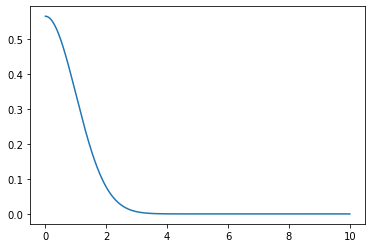

In [43]:
plt.plot(items, prob)

In [50]:
n = 5000
data = sampling([1, -1], probabilities=[0.5, 0.5], n=n) * sampling(items, std_gauss, n=n)

[]

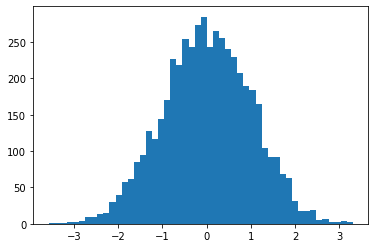

In [51]:
plt.hist(data, bins=50)
plt.plot()

In [52]:
data = np.random.normal(0, 1, n)

[]

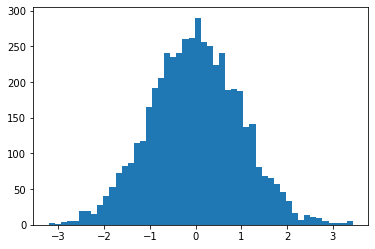

In [53]:
plt.hist(data, bins=50)
plt.plot()

In [54]:
def laplace(x):
    return np.exp(-np.abs(x))

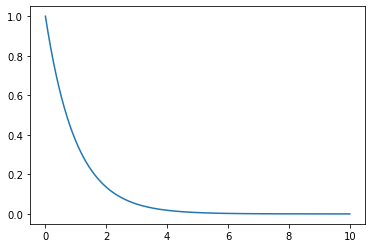

In [55]:
plt.plot(items, laplace(items))

In [56]:
prob = laplace(items)
data = np.array(sampling([1, -1], probabilities=[0.5, 0.5], n=n) * sampling(items, laplace, n=n))

[]

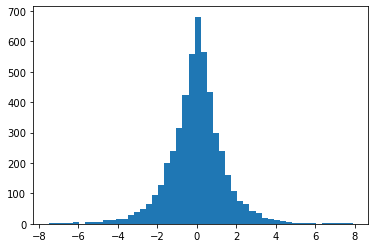

In [57]:
plt.hist(data, bins=50)
plt.plot()